In [1]:
import cptac
import scipy
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [2]:
cptac.download("brca")
cptac.download("ccrcc")
cptac.download("colon")
cptac.download("endometrial")
cptac.download("gbm")
cptac.download("luad")
cptac.download("ovarian")
cptac.download("hnscc")
cptac.download("lscc")

brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
colon = cptac.Colon()
en = cptac.Endometrial()
gbm = cptac.Gbm()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 15)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 16)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 18)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 19)


In [3]:
##Important genes from "Comprehensive Characterization of Cancer Driven Genes and Mutations"
important_genes = ['ACVR2A','AKT1','APC','ARHGAP35','ARID1A','ARID2','ATM','ATRX','BAP1','BCOR','BRAF','BRCA1','BRD7','CASP8','CDH1','CDKN1A','CDKN2A', 'CHD4', 'CTCF', 'CTNNB1', 'CUL3', 'DNMT3A', 'EGFR', 'EIF1AX', 'EP300', 'EPHA2', 'ERBB2', 'ERBB3', 'FAT1', 'FBXW7', 'FGFR2', 'FGFR3', 'FOXA1','GNA11', 'GNAS', 'HIST1H1E', 'HLA-A', 'HRAS', 'IDH1', 'IDH2', 'KANSL1', 'KDM6A','KEAP1', 'KIT', 'KLF5', 'KMT2C', 'KMT2D', 'KRAS', 'LZTR1', 'MAP3K1', 'MAX', 'MET', 'NF1', 'NF2', 'NFE2L2', 'NRAS', 'NSD1', 'PBRM1', 'PIK3CA', 'PIK3R1', 'PPP2R1A', 'PTEN', 'PTPN11', 'RAC1', 'RASA1', 'RB1', 'RBM10', 'RHOA', 'RNF43', 'RUNX1', 'SETD2', 'SF3B1', 'SMAD2', 'SMAD4', 'SMARCA4', 'SMC1A', 'SPOP', 'STAG2', 'STK11', 'TCF12', 'TGFBR2', 'TP53', 'U2AF1', 'ZNF750']
important_genes = sorted(important_genes)

In [4]:
##Function to show all plots
def show_plots(tissue, tissue_type = 'both'):
    prot = tissue.get_proteomics(tissue_type)
    trans = tissue.get_transcriptomics(tissue_type)
    prot_cols = prot.columns
    trans_cols = trans.columns
    for i in important_genes:
        if i not in prot_cols or i not in trans_cols:
            continue
        test_prot = prot[i]
        test_trans = trans[i]
        if isinstance(test_prot, pd.core.frame.DataFrame): 
            test_prot = test_prot.iloc[:,0]
        if isinstance(test_trans, pd.core.frame.DataFrame):
            test_trans = test_trans.iloc[:,0]
    #     test_prot_trans = gbm.multi_join({'proteomics' : [i], 'transcriptomics': [i]}, tissue_type = 'tumor', flatten = True)
        test_prot_trans = pd.DataFrame(test_prot).join(pd.DataFrame(test_trans),how= 'outer')
        columns = test_prot_trans.columns
        test_prot_trans = test_prot_trans.rename(columns={columns[0]: i+'_proteomics', columns[-1] : i+'_transcriptomics'})
        test_plot1 = sns.regplot( x = i+'_proteomics', y= i+'_transcriptomics',  data = test_prot_trans)
    #     test_plot1.set(xlim=(-5.7,7.5),ylim=(-1,6))
        plt.show()

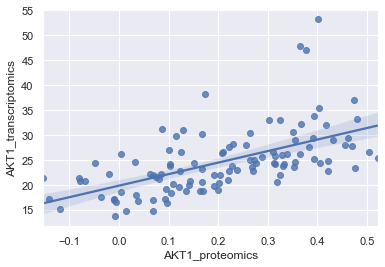

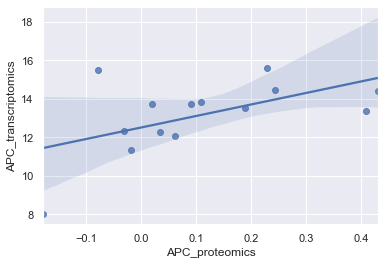

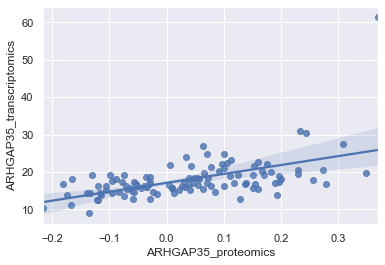

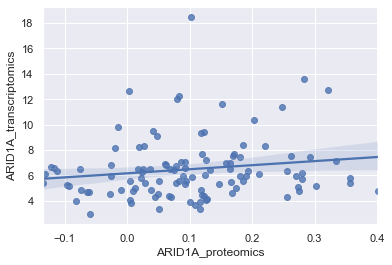

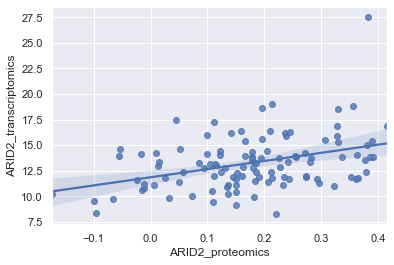

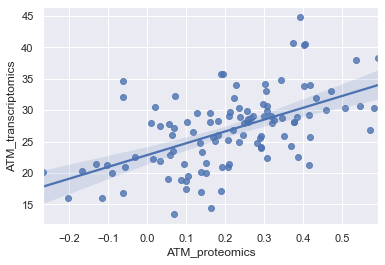

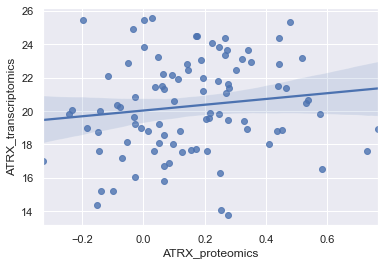

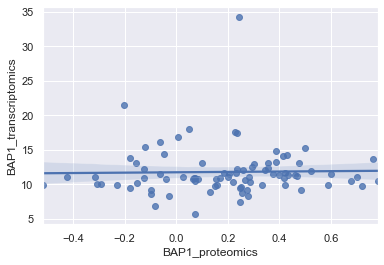

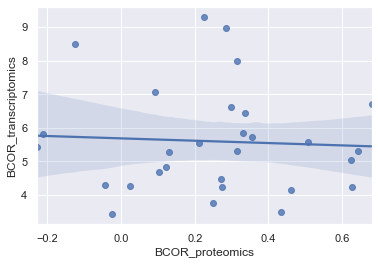

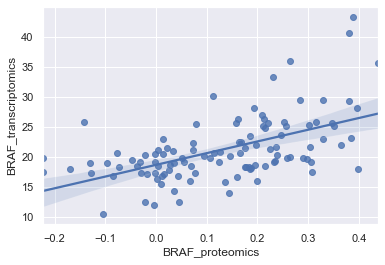

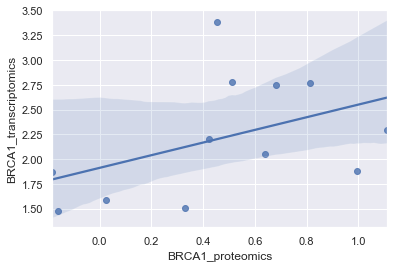

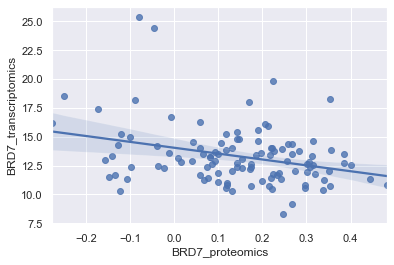

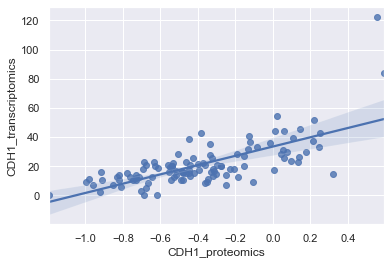

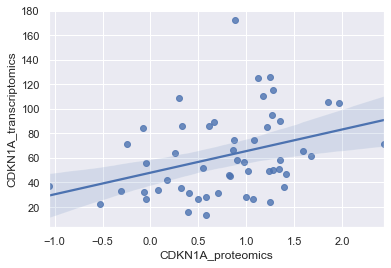

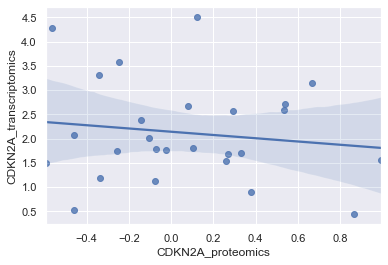

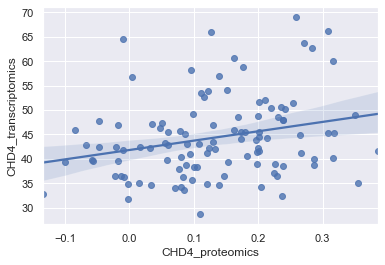

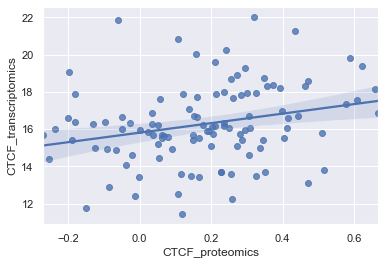

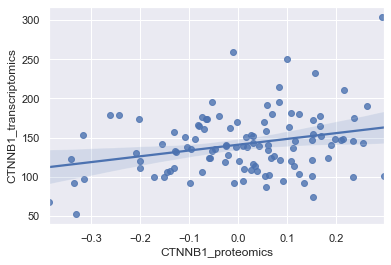

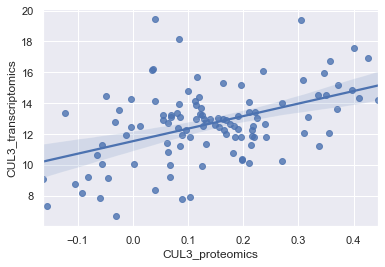

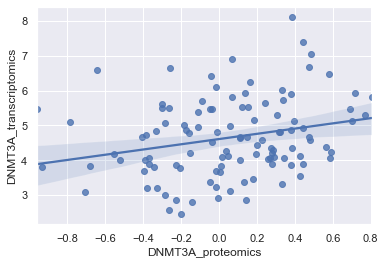

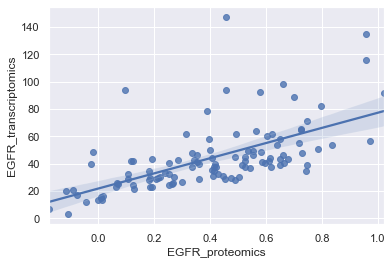

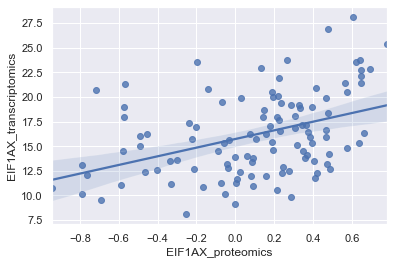

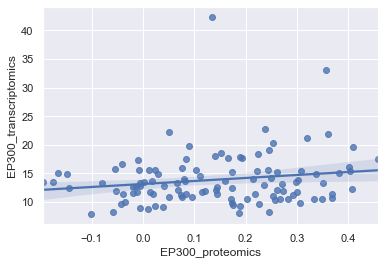

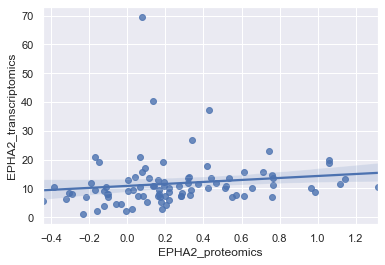

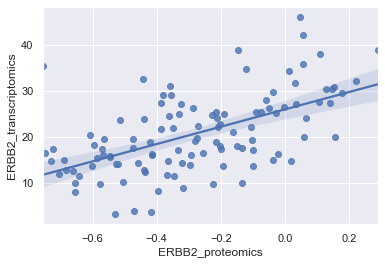

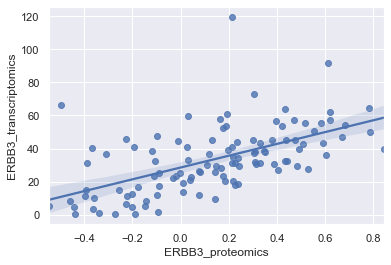

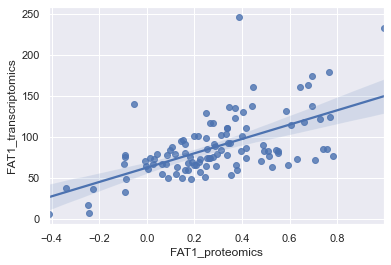

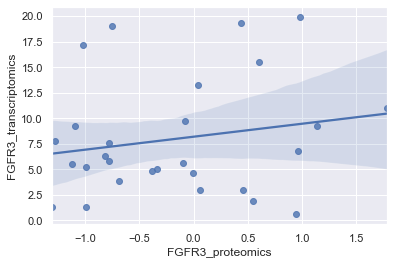

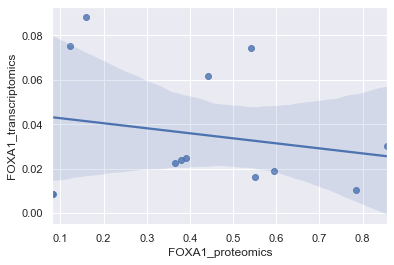

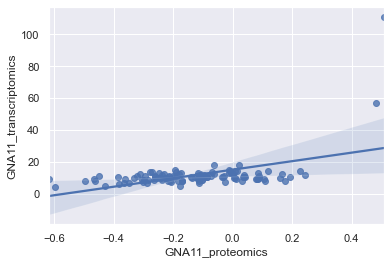

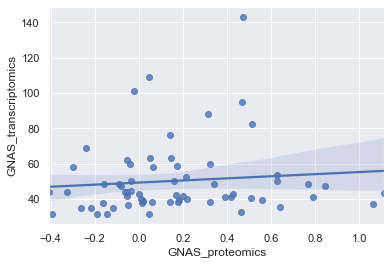

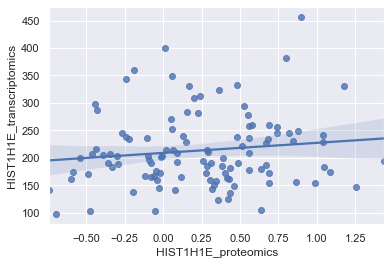

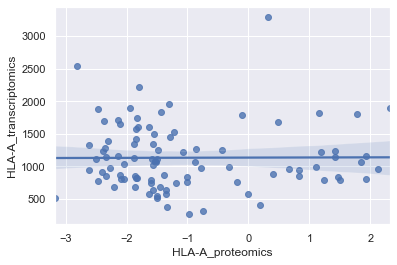

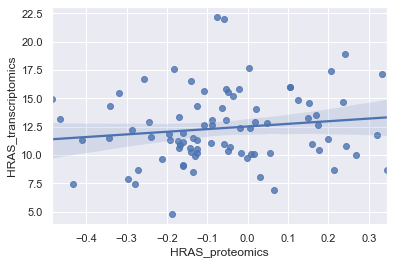

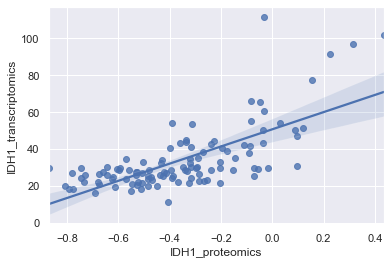

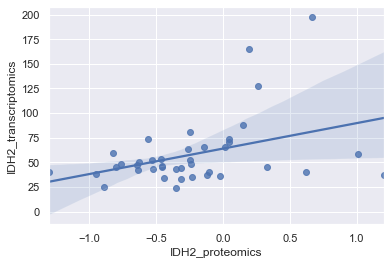

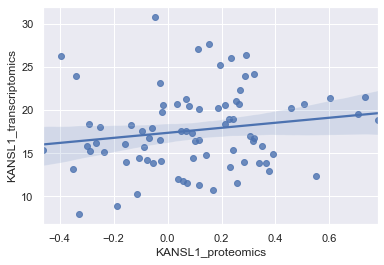

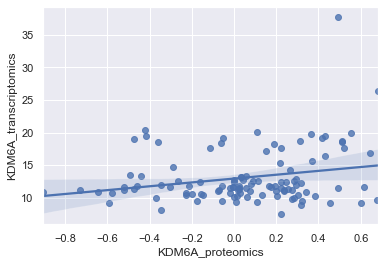

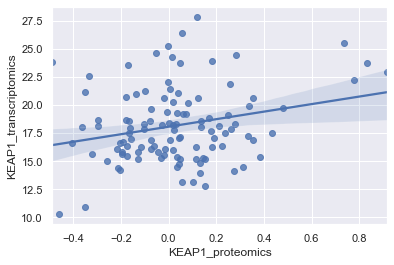

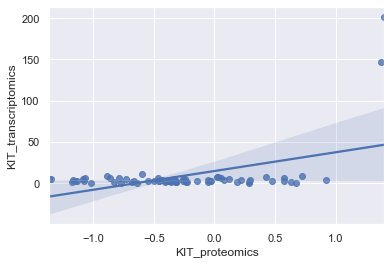

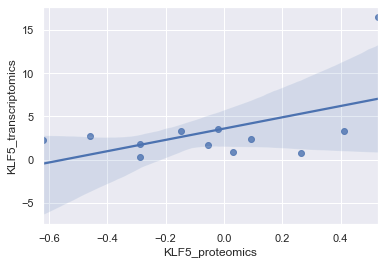

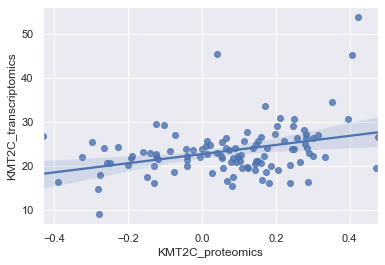

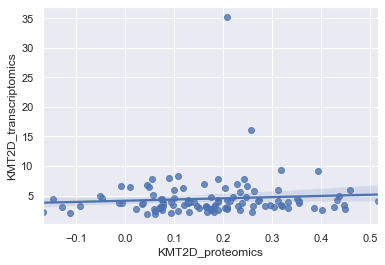

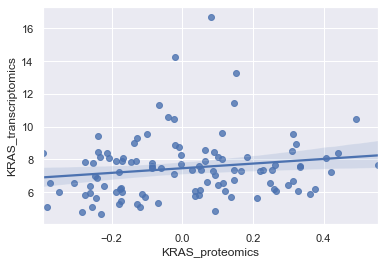

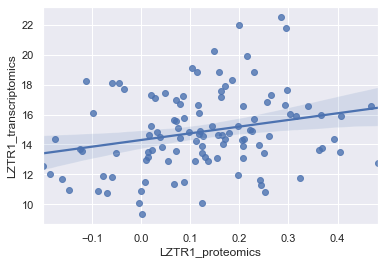

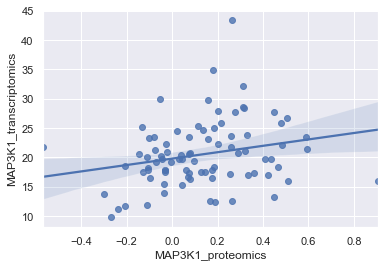

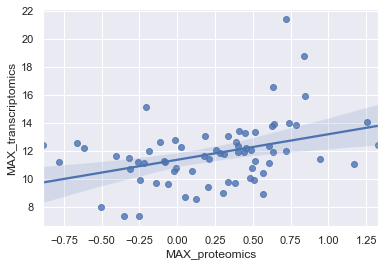

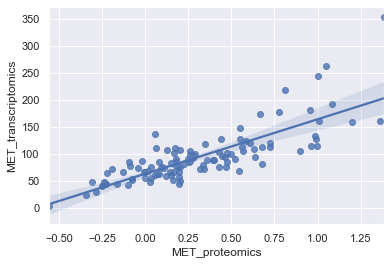

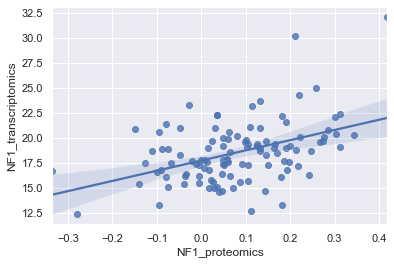

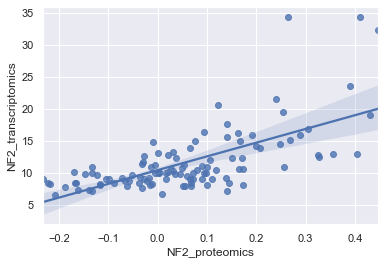

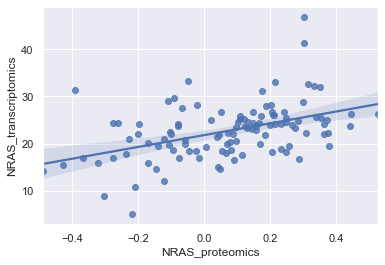

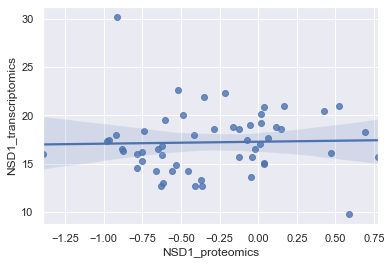

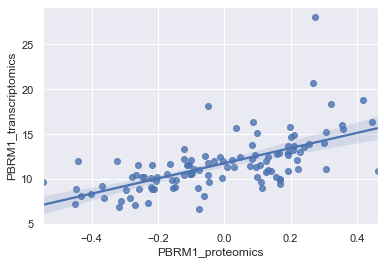

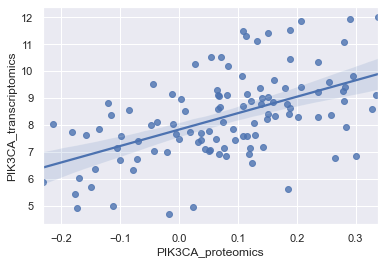

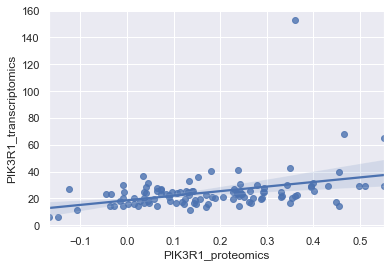

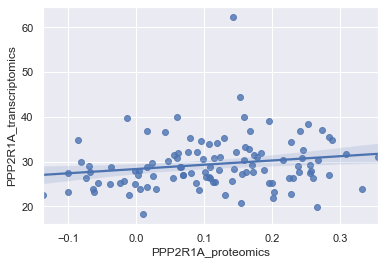

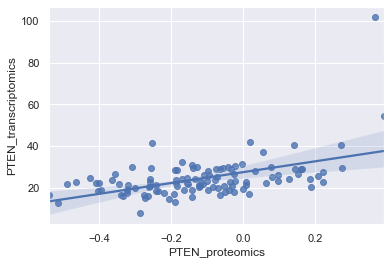

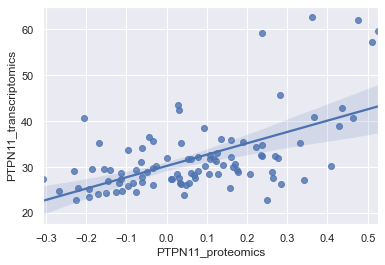

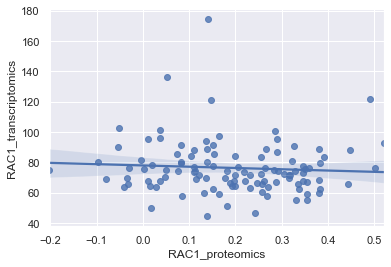

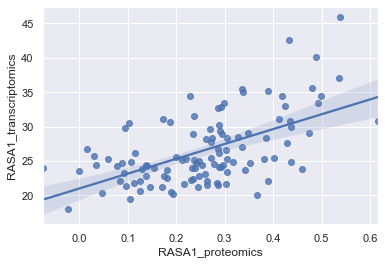

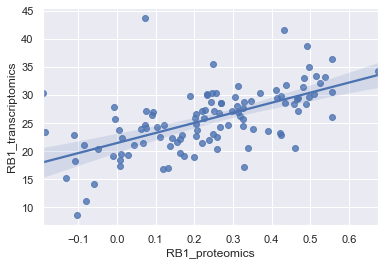

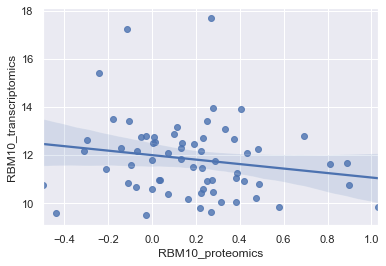

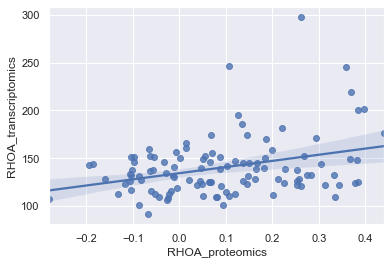

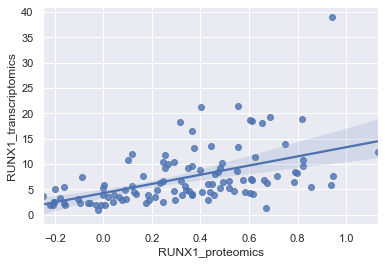

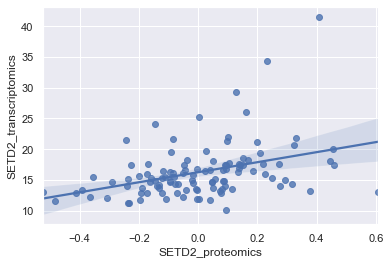

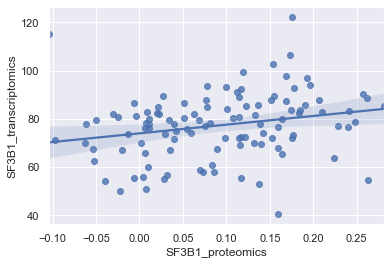

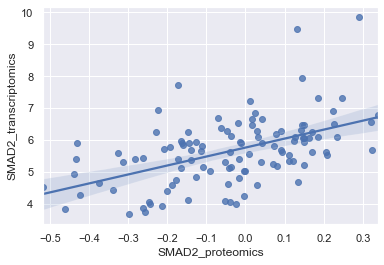

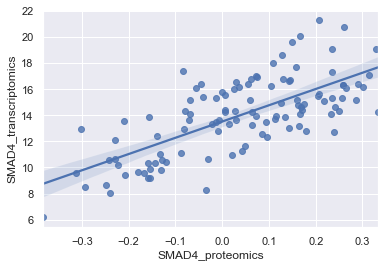

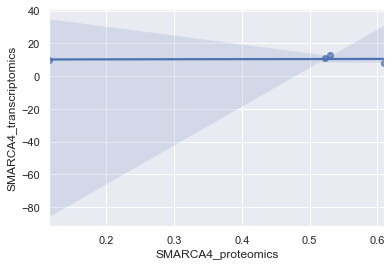

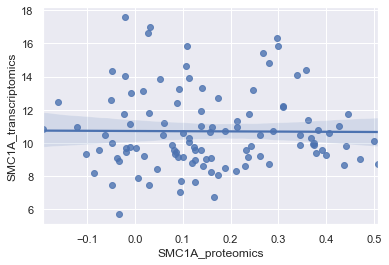

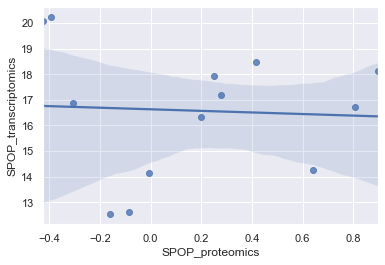

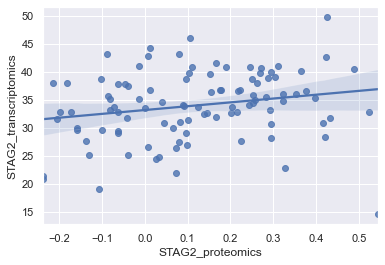

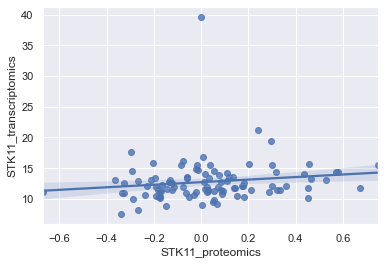

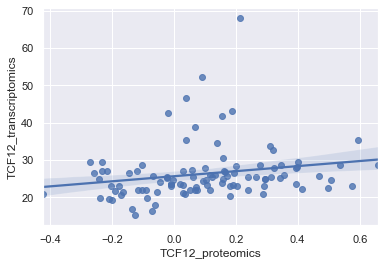

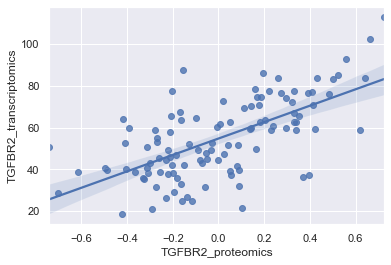

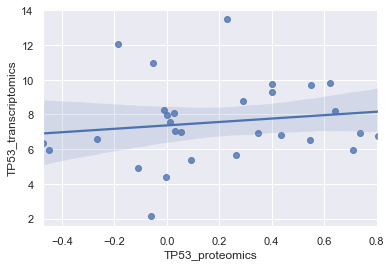

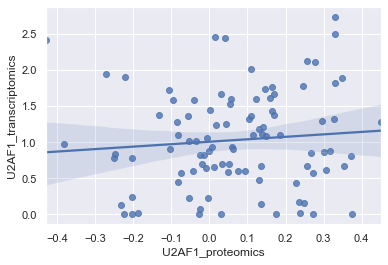

In [5]:
show_plots(ccrcc,'tumor')

In [ ]:
show_plots(colon,'tumor')

In [ ]:
show_plots(en,'tumor')

In [ ]:
show_plots(gbm,'tumor')

In [ ]:
show_plots(luad,'tumor')

In [ ]:
show_plots(ovarian,'tumor')

In [ ]:
show_plots(hnscc,'tumor')

In [ ]:
show_plots(lscc,'tumor')